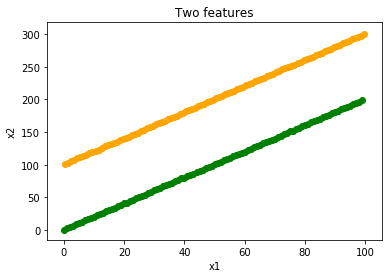

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


x1 = np.arange(0,100,0.5)
x2 = x1 * 2 + np.random.rand(x1.shape[0]) 

x2[1::2] += 100

_ = plt.scatter(x1[::2] ,x2[::2],c='green')
_ = plt.scatter(x1[1::2],x2[1::2],c='orange')

plt.ylabel('x2')
plt.xlabel('x1')

plt.title('Two features')

plt.show()

It's Clear that data is linearly separable in fact you can get a 100% accuracy on it using a linear model

In [2]:
# Creating X matrix using the two features
X = np.stack([x1,x2]).T

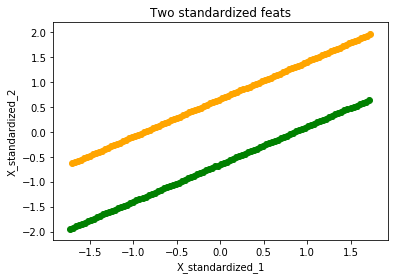

In [3]:
# Standardizing X
X_standardized = (X-X.mean(axis=0)) / X.std(axis=0)

_ = plt.scatter(X_standardized[:,0][::2] ,X_standardized[:,1][::2],c='green')
_ = plt.scatter(X_standardized[:,0][1::2],X_standardized[:,1][1::2],c='orange')

plt.xlabel('X_standardized_1')
plt.ylabel('X_standardized_2')
plt.title('Two standardized feats')

plt.show()

### PCA

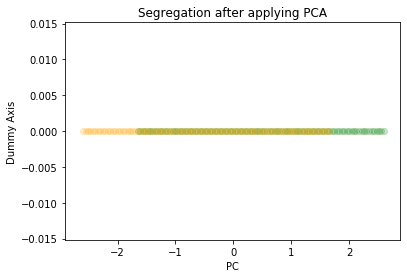

In [4]:
pca = PCA(n_components=1)
pca.fit(X_standardized)


X_pc = pca.transform(X_standardized)


_ = plt.scatter(X_pc[::2] ,[0]*(X_pc.shape[0]//2),c='green' ,alpha=0.2)
_ = plt.scatter(X_pc[1::2],[0]*(X_pc.shape[0]//2),c='orange',alpha=0.2)

plt.xlabel('PC')
plt.ylabel('Dummy Axis')
plt.title('Segregation after applying PCA')

plt.show()

### t-SNE

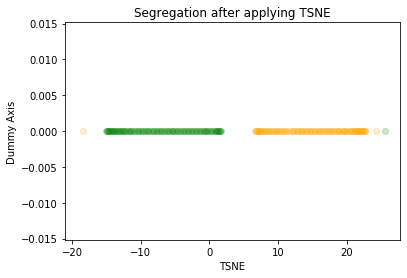

In [5]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=1,init='random').fit_transform(X)

_ = plt.scatter(X_tsne [::2],[0]*(X_tsne.shape[0]//2),c='green',alpha=0.2)
_ = plt.scatter(X_tsne[1::2],[0]*(X_tsne.shape[0]//2),c='orange',alpha=0.2)

plt.xlabel('TSNE')
plt.ylabel('Dummy Axis')
plt.title('Segregation after applying TSNE')

plt.show()

### Validating both

It's Clear that T-sne performs a much better job job than PCA in reducing data dimensionality.

We can quantify this by fitting a linear model to both and see the accuracy in each.

In [6]:
print('Shape of PCA result.',X_pc.shape)
print('Shape of Tsne result.',X_tsne.shape)

Shape of PCA result. (200, 1)
Shape of Tsne result. (200, 1)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create y
y       = np.zeros_like(X_pc)
y[1::2] = 1


clf_pc   = LogisticRegression(random_state=0).fit(X_pc  , y)
clf_tsne = LogisticRegression(random_state=0).fit(X_tsne, y)


print('PCA accuracy:' ,accuracy_score(y.squeeze(),clf_pc.predict(X_pc)))
print('TSNE accuracy:',accuracy_score(y.squeeze(),clf_tsne.predict(X_tsne)))

PCA accuracy: 0.61
TSNE accuracy: 0.99


C:\Users\Muham\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Muham\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### PCA vs T-sne (Consistency of results)

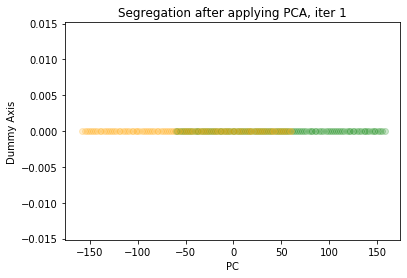

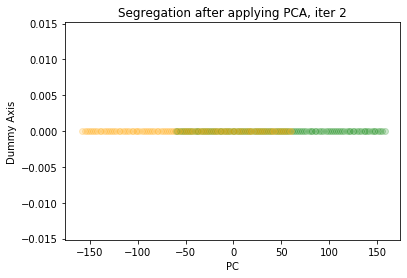

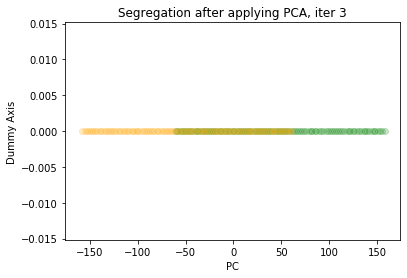

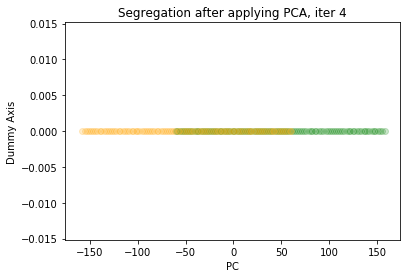

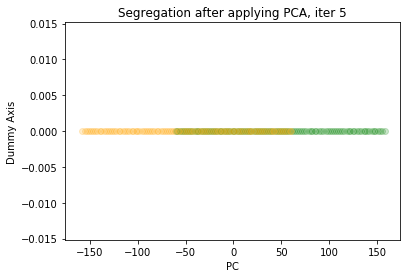

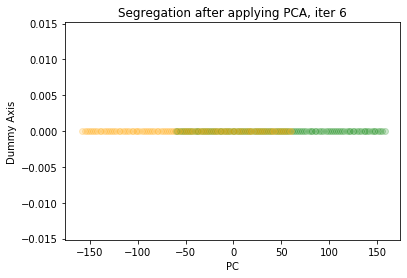

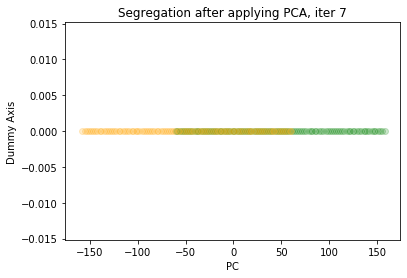

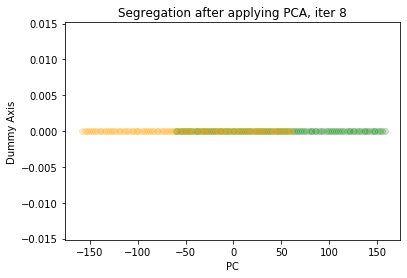

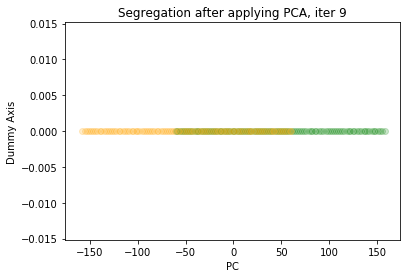

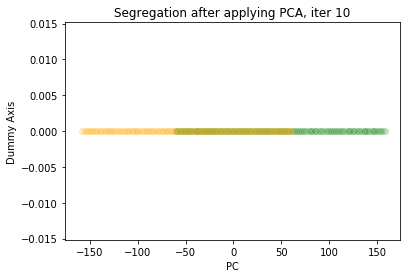

In [8]:
for i in range(10):
    pca = PCA(n_components=1)
    pca.fit(X)

    X_pc = pca.transform(X)


    _ = plt.scatter(X_pc[::2],[0]*(X_pc.shape[0]//2),c='green',alpha=0.2)
    _ = plt.scatter(X_pc[1::2],[0]*(X_pc.shape[0]//2),c='orange',alpha=0.2)

    plt.xlabel('PC')
    plt.ylabel('Dummy Axis')
    plt.title(f'Segregation after applying PCA, iter {i+1}')

    plt.show()

PCA is a deterministic algorithm, will always lead to the same results.

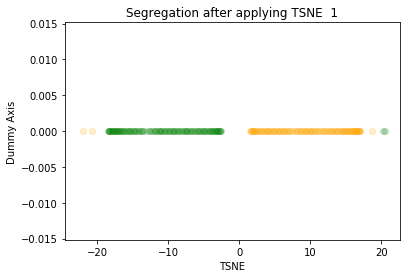

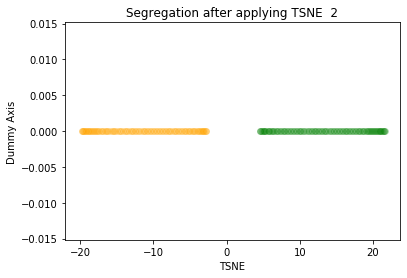

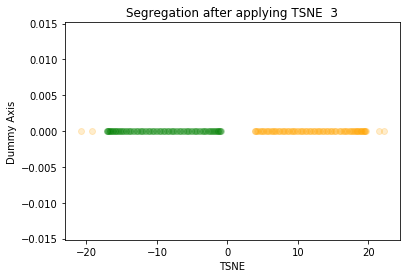

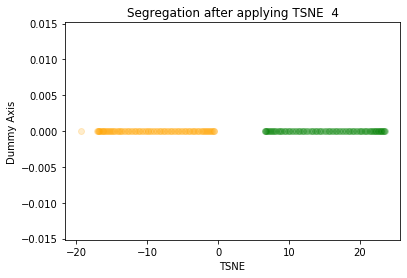

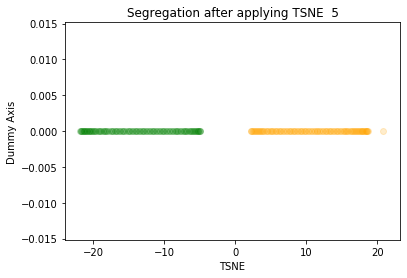

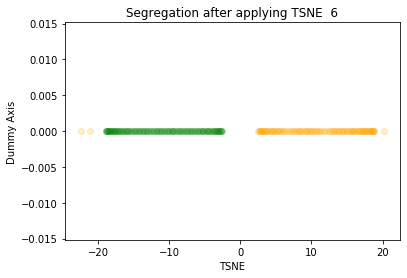

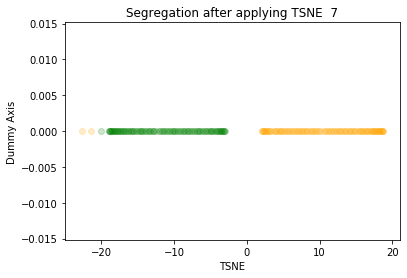

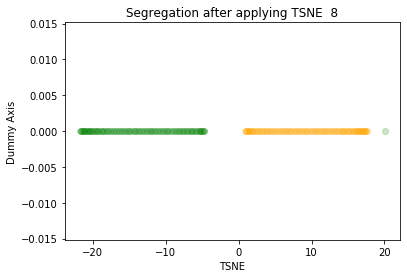

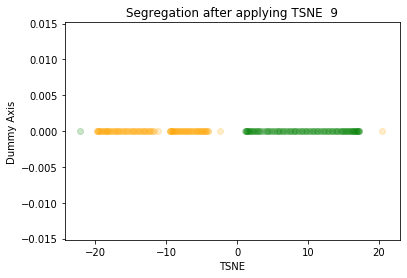

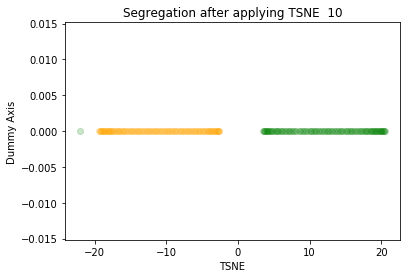

In [9]:
for i in range(10):
    X_tsne = TSNE(n_components=1,init='random').fit_transform(X)

    _ = plt.scatter(X_tsne [::2],[0]*(X_tsne.shape[0]//2),c='green',alpha=0.2)
    _ = plt.scatter(X_tsne[1::2],[0]*(X_tsne.shape[0]//2),c='orange',alpha=0.2)

    plt.xlabel('TSNE')
    plt.ylabel('Dummy Axis')
    plt.title(f'Segregation after applying TSNE  {i+1}')

    plt.show()

On the other hand, t-SNE is stochastic. However, it's clear it gets better results almost all the time than PCA.

### Understanding ICA

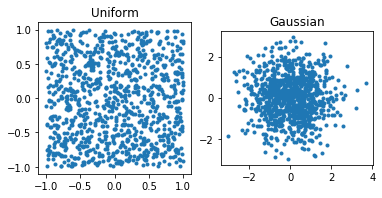

In [10]:
np.random.seed(100)
U1 = np.random.uniform(-1, 1, 1000)
U2 = np.random.uniform(-1, 1, 1000)

G1 = np.random.randn(1000)
G2 = np.random.randn(1000)

%matplotlib inline
# let's plot our signals

from matplotlib import pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(121, aspect = "equal")
ax1.scatter(U1, U2, marker = ".")
ax1.set_title("Uniform")


ax2 = fig.add_subplot(122, aspect = "equal")
ax2.scatter(G1, G2, marker = ".")
ax2.set_title("Gaussian")


plt.show()

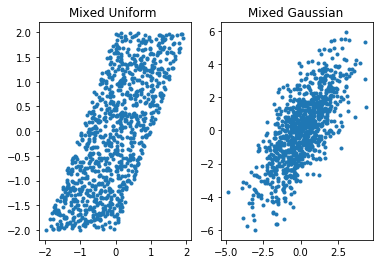

In [11]:
# now comes the mixing part. we can choose a random matrix for the mixing

A = np.array([[1, 0], [1, 2]])

U_source = np.array([U1,U2])
U_mix = U_source.T.dot(A)

G_source = np.array([G1, G2])
G_mix = G_source.T.dot(A)

# plot of our dataset

fig  = plt.figure()

ax1 = fig.add_subplot(121)
ax1.set_title("Mixed Uniform ")
ax1.scatter(U_mix[:, 0], U_mix[:,1], marker = ".")

ax2 = fig.add_subplot(122)
ax2.set_title("Mixed Gaussian ")
ax2.scatter(G_mix[:, 0], G_mix[:, 1], marker = ".")


plt.show()  

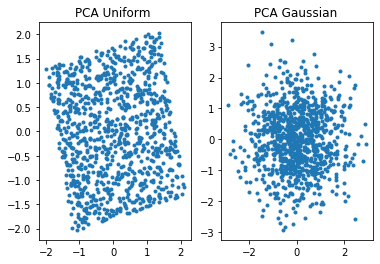

In [12]:
# PCA and whitening the dataset
from sklearn.decomposition import PCA 
U_pca = PCA(whiten=True).fit_transform(U_mix)
G_pca = PCA(whiten=True).fit_transform(G_mix)

# let's plot the uncorrelated columns from the datasets
fig  = plt.figure()

ax1 = fig.add_subplot(121)
ax1.set_title("PCA Uniform ")
ax1.scatter(U_pca[:, 0], U_pca[:,1], marker = ".")

ax2 = fig.add_subplot(122)
ax2.set_title("PCA Gaussian ")
ax2.scatter(G_pca[:, 0], G_pca[:, 1], marker = ".")

If the source variables are gaussian ICA is not required and PCA is sufficient.

Shape of ICA result. (200, 1)


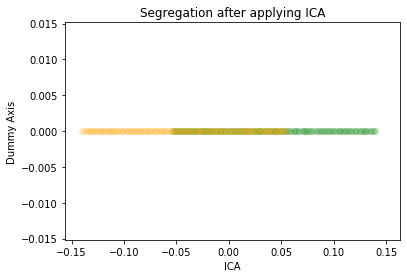

ICA accuracy: 0.72


C:\Users\Muham\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn.decomposition import FastICA

transformer = FastICA(n_components=1,random_state=0,whiten='unit-variance')

X_ica = transformer.fit_transform(X)

print('Shape of ICA result.',X_ica.shape)

_ = plt.scatter(X_ica [::2],[0]*(X_ica.shape[0]//2),c='green',alpha=0.2)
_ = plt.scatter(X_ica[1::2],[0]*(X_ica.shape[0]//2),c='orange',alpha=0.2)

plt.xlabel('ICA')
plt.ylabel('Dummy Axis')
plt.title('Segregation after applying ICA')

plt.show()


# Logistic regression
clf_ica = LogisticRegression(random_state=0).fit(X_ica, y)
print('ICA accuracy:' ,accuracy_score(y.squeeze(),clf_ica.predict(X_ica)))

Just like PCA, ICA is deterministic.

Corr Matrix Between X_pc and X_ica:
[[1. 1.]
 [1. 1.]]


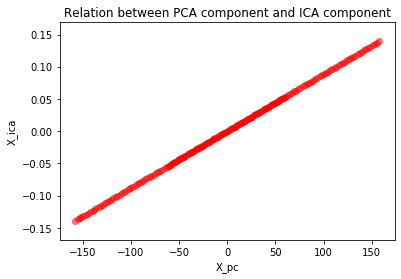

In [14]:
print('Corr Matrix Between X_pc and X_ica:')
print(np.corrcoef(X_pc.squeeze(),X_ica.squeeze()))

_ = plt.scatter(X_pc.squeeze(),X_ica.squeeze(),c='red',alpha=0.5)

plt.xlabel('X_pc')
plt.ylabel('X_ica')
plt.title('Relation between PCA component and ICA component')

plt.show()

PCA component is inversely correlated to ICA component!

- PCA results in components that are linearly independent (uncorrelated/orthogonal)
- ICA ~as I understand, results in components that are independent (linearly & non-linearly)

### Linear Discriminant Analysis

- Used to reduce the number of features before classification
- Focuses on maximizing separability among two **known** categories 
- We want to maximize the distance between the two means (assuming two known categories)

Shape of LDA result. (200,)


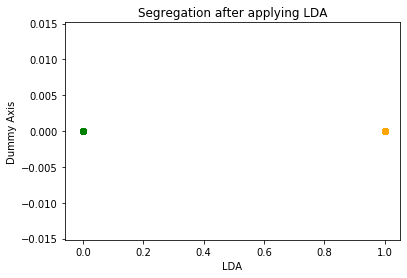

LDA accuracy: 1.0


C:\Users\Muham\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X, y.squeeze())

X_lda = lda.predict(X)

print('Shape of LDA result.',X_lda.shape)

_ = plt.scatter(X_lda [::2],[0]*(X_lda.shape[0]//2),c='green',alpha=0.2)
_ = plt.scatter(X_lda[1::2],[0]*(X_lda.shape[0]//2),c='orange',alpha=0.2)

plt.xlabel('LDA')
plt.ylabel('Dummy Axis')
plt.title('Segregation after applying LDA')

plt.show()


# Logistic regression
clf_lda = LogisticRegression(random_state=0).fit(X_lda.reshape(-1,1), y)
print('LDA accuracy:' ,accuracy_score(y.squeeze(),X_lda))

LDA is the best so far, it needs known categories, though.

### umap

In [16]:
import umap

# mapper = umap.UMAP().fit(X)
# X_umap = mapper.transform(X)
# b
# print(X_umap.shape)

LoweringError: Failed in nopython mode pipeline (step: nopython mode backend)
[1m[1mStoring i64 to ptr of i32 ('dim'). FE type int32
[1m
File "C:\Users\Muham\anaconda3\lib\site-packages\umap\layouts.py", line 52:[0m
[1mdef rdist(x, y):
    <source elided>
    result = 0.0
[1m    dim = x.shape[0]
[0m    [1m^[0m[0m
[0m
[0m[1mDuring: lowering "dim = static_getitem(value=$8load_attr.2, index=0, index_var=$const10.3, fn=<built-in function getitem>)" at C:\Users\Muham\anaconda3\lib\site-packages\umap\layouts.py (52)[0m